<a href="https://colab.research.google.com/github/Ejay123-tech/KMeans-clustering/blob/main/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K MEANS**
## 1. **Introduction to Unsupervised Learning**

**Unsupervised learning** - a category of machine learning where algorithms learn patterns from data without any labeled outcomes or explicit instructions
on what to predict.

### **Types of Unsupervised Learning:**
 Common unsupervised learning tasks include:

1. **Clustering:** Grouping similar data points into clusters based on their features (e.g. K-Means, hierarchical clustering). This is useful for discovering categories or segments in data
2. **Dimensionality Reduction:** Simplifying data by reducing the number of features while preserving important structure (e.g. PCA, t-SNE). This helps visualize data or speed up algorithms by removing noise and redundancy.
3.**Association Rules:** Finding relationships in data (e.g. market basket analysis where you discover that customers who buy item A often also buy item B).
4. **Anomaly Detection:** Identifying outliers or unusual data points that don’t fit established patterns (useful for fraud detection, fault detection, etc.) Each of these methods serves a different purpose, but they all share the characteristic of learning from unlabeled data.

## 2. **Overview of K-Means Clustering**
K-Means is a widely-used centroid-based clustering algorithm that partitions data into K distinct clusters. It’s used in many real-world applications such as customer segmentation, image compression, and document clustering.
At its core, K-Means tries to place cluster centers (called centroids) such that data points assigned to each centroid are as close as possible to it.

**STEPS OF THE KMEANS ALGORITHIM**
* **Choose K:** Decide on the number of clusters K for your data. (This is a crucial parameter that often requires experimentation or domain knowledge.)
* **Initialize Centroids:** Select K initial centroids. This is often done randomly or with a smarter initialization like k-means++ to improve results.
* **Assignment Step:** Assign each data point to the nearest centroid. This forms K clusters of data points, where each point belongs to the cluster with the closest center (usually using Euclidean distance).
* **Update Step:** Recalculate the centroid of each cluster by computing the mean of all data points in that cluster. (This “moves” the centroid to a new position that better represents the cluster.)
* **Repeat:** Steps 3 and 4 are repeated until the centroids no longer change significantly or a maximum number of iterations is reached. This means the clustering has converged and cluster assignments are stable.



# **3. Step-by-step Implementation in Python**
We shall apply the following steps:

* **Import necessary libraries:** We’ll use Python’s scikit-learn library for the K-Means algorithm and some standard libraries for handling data (like NumPy and pandas if needed).
* **Load and preprocess the dataset:** Load the Iris dataset. For unsupervised learning, we will use only the feature variables (petal and sepal measurements) and not the actual species labels. We’ll also check if we need to scale the features – K-Means works best when features are on similar scales.
* **Determine optimal number of clusters (K):**  Use the elbow method to decide on a good number of clusters. This means running K-Means for a range of K values (e.g., 1 through 10) and recording the inertia for each, then looking for the elbow point in the inertia vs. K curve.
* **Apply K-Means clustering:** Once we decide on K, we’ll run the K-Means algorithm on the data to get the cluster assignments.
* **Visualize and interpret clusters**: Finally, we’ll (conceptually) visualize the clusters to see how the data points are grouped. Since we can’t plot directly here, we will describe how you would normally visualize (e.g., using a scatter plot) and maybe output some cluster statistics. We’ll also verify if the clusters make sense (for example, comparing to the actual Iris species, if we were to peek at them, to see how well K-Means performed).

In [11]:
# Importing the libraries
import numpy as np
import pandas as pd

In [23]:

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Loading the dataset
iris = load_iris()
X = iris.data  # Extract the features

print("Data Shape:", X.shape)  # Now X is a NumPy array
# First five rows
print("First 5 rows of data:", X[:5])
"""
The Shape oF the dataset whish we have found to be (150,4).  This have been obtained through the X.shape command.
This signifies that our dataset has 150 rows( which are the samples) and 4 columns( Which are the features ).
"""


Data Shape: (150, 4)
First 5 rows of data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


'\nThe Shape oF the dataset whish we have found to be (150,4).  This have been obtained through the X.shape command.\nThis signifies that our dataset has 150 rows( which are the samples) and 4 columns( Which are the features ).\n'

In [25]:
inertias =[]
Ks = range(1,11)
for k in Ks:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)
print(inertias)
"""
For each value of k (number of clusters):
A KMeans model is initialized with: n_clusters=k: The number of clusters.
n_init=10: Runs the K-Means algorithm 10 times with different centroid seeds and picks the best one.
random_state=0: Ensures reproducibility of results.
fit(X): Trains the K-Means model on dataset X.
kmeans.inertia_: Measures inertia, which is the sum of squared distances of points to their closest cluster center.
The computed inertia is appended to the inertias list.
"""


[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.46117267267268, 39.03998724608725, 34.305815295815314, 30.132440554614483, 28.29063524195104, 25.970929851803426]


In [26]:
# Fit K-Means with K=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)

# Retrieve the cluster labels for each data point
labels = kmeans.labels_
print("Cluster labels for first 10 points:", labels[:10])

Cluster labels for first 10 points: [1 1 1 1 1 1 1 1 1 1]


In [27]:
# Examine how many points are in each cluster
import numpy as np
clusters, counts = np.unique(labels, return_counts=True)
print("Cluster distribution:")
for cluster, count in zip(clusters, counts):
    print(f"Cluster {cluster}: {count} points")

Cluster distribution:
Cluster 0: 62 points
Cluster 1: 50 points
Cluster 2: 38 points


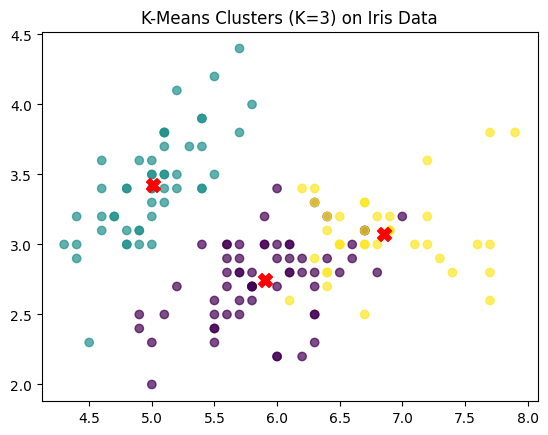

In [28]:
# (Pseudo-code for visualization – not executed here)
import matplotlib.pyplot as plt

# Reduce data to 2D for visualization (e.g., using first two features or PCA)
X_2d = X[:, :2]  # take first two features for simplicity

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', marker='X')  # centroids
plt.title("K-Means Clusters (K=3) on Iris Data")
plt.show()

In [29]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette score for K=3:", score)

Silhouette score for K=3: 0.5528190123564095


4. End-to-end Example with Python Code
5. Analysis and Interpretation
6. Conclusion and Further Applications